In [1]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv('winequality-red.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<function matplotlib.pyplot.show(close=None, block=None)>

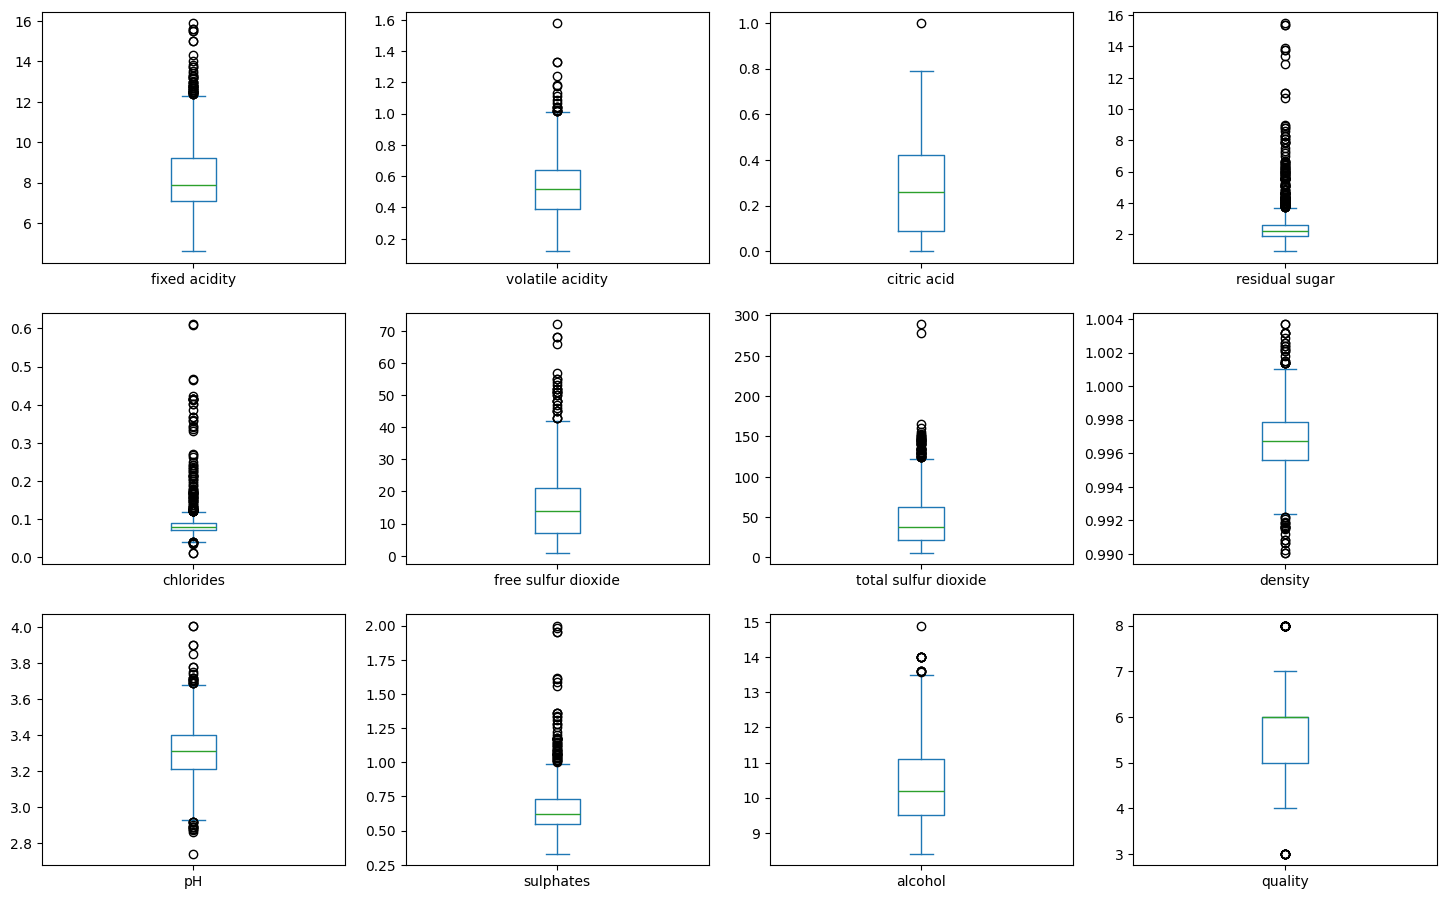

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df.plot(kind='box',subplots=True,layout=(4,4),figsize=(18,15))
plt.show

In [5]:
def plot(df, column):
    plt.figure(figsize=(10,5))
    plt.subplot(1,1,1)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

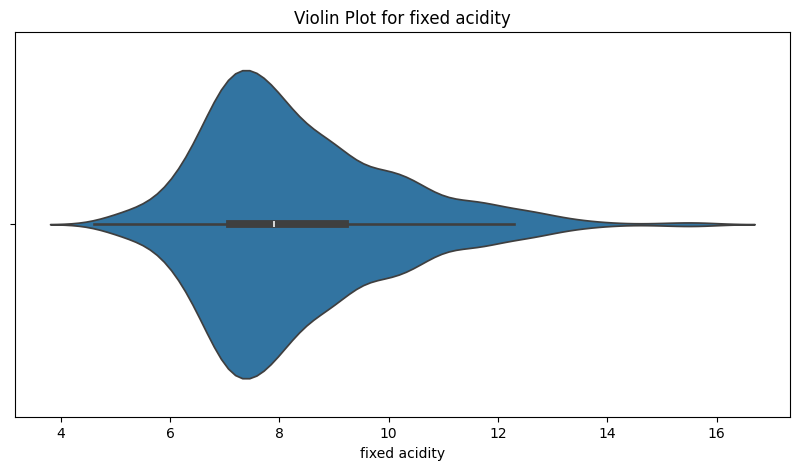

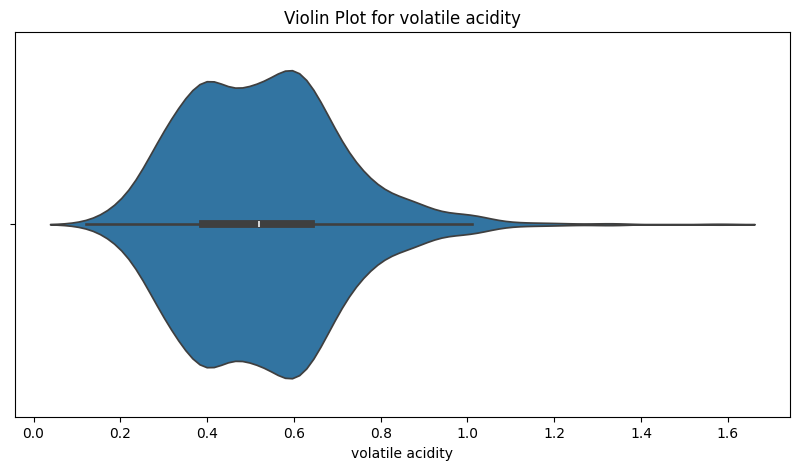

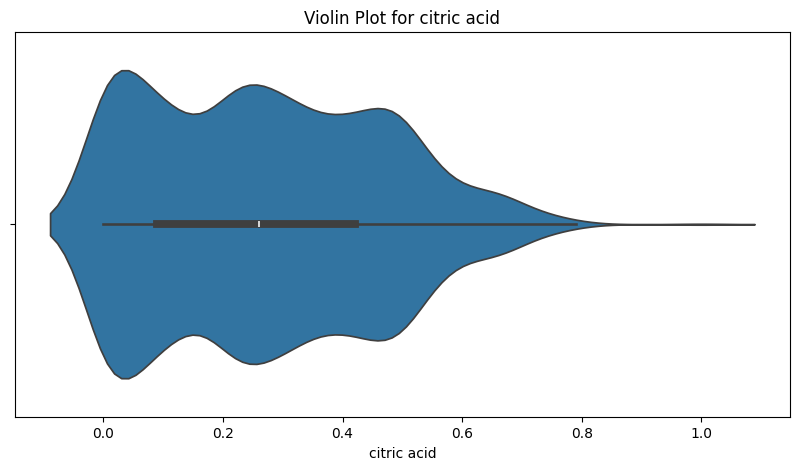

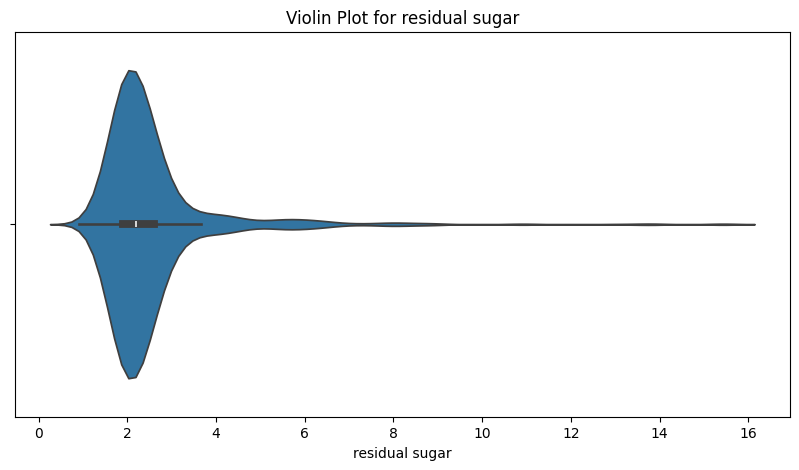

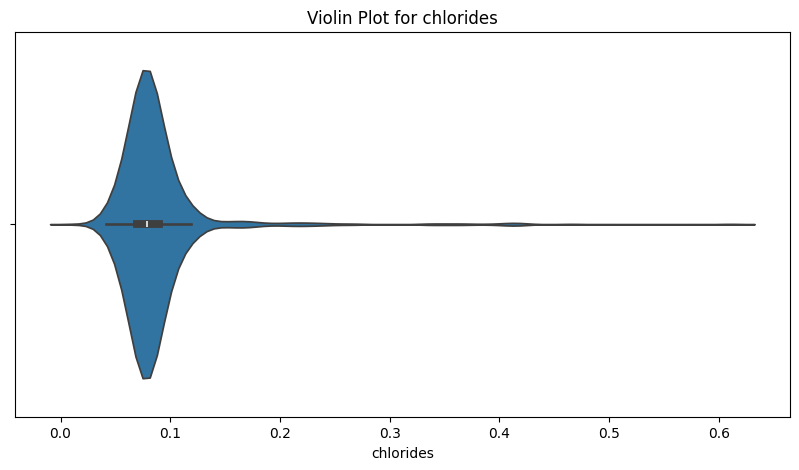

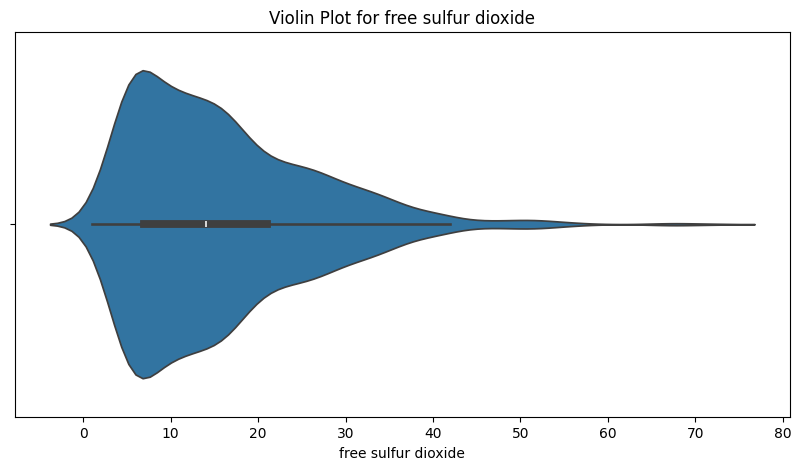

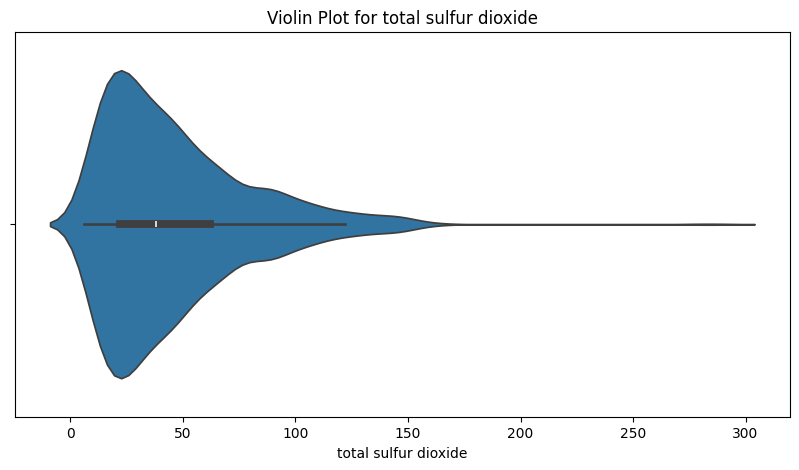

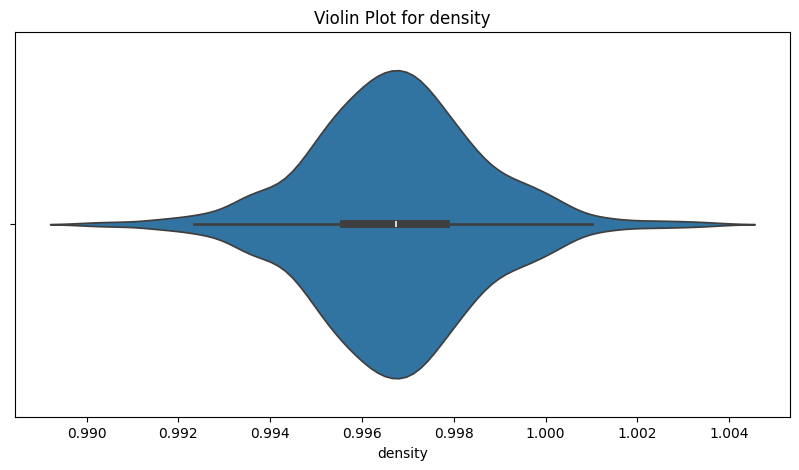

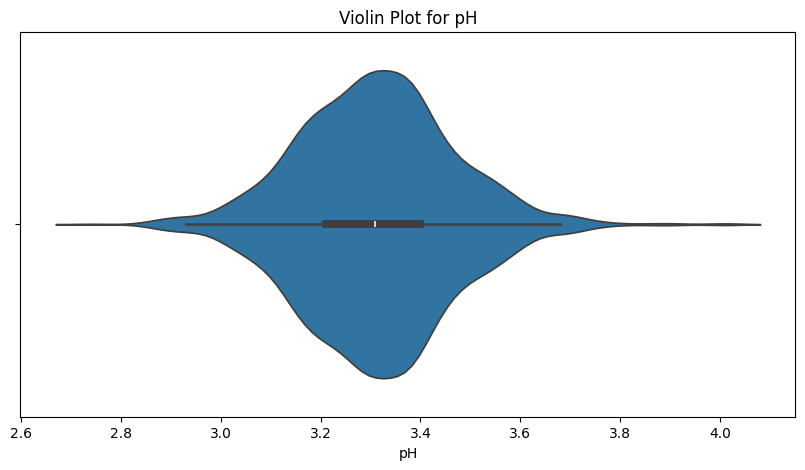

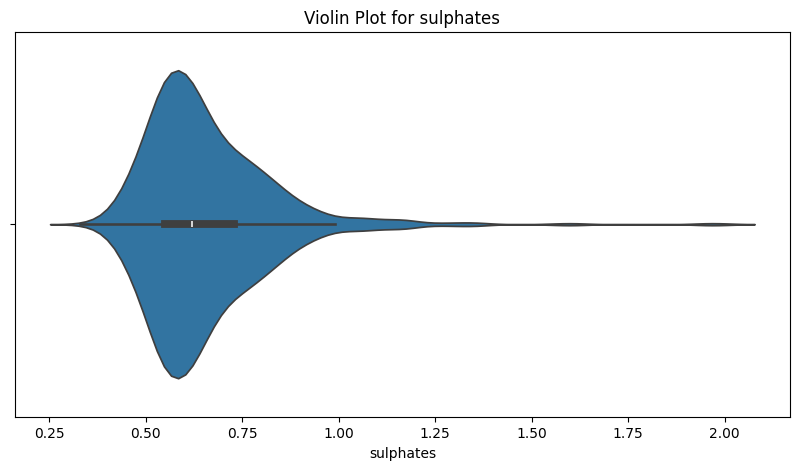

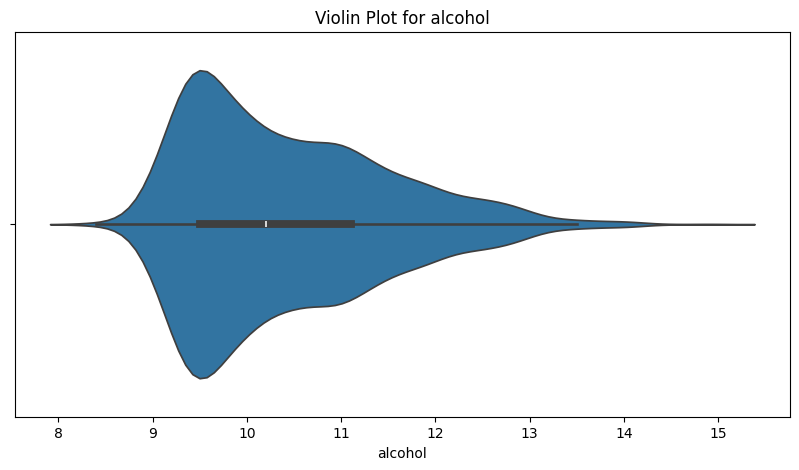

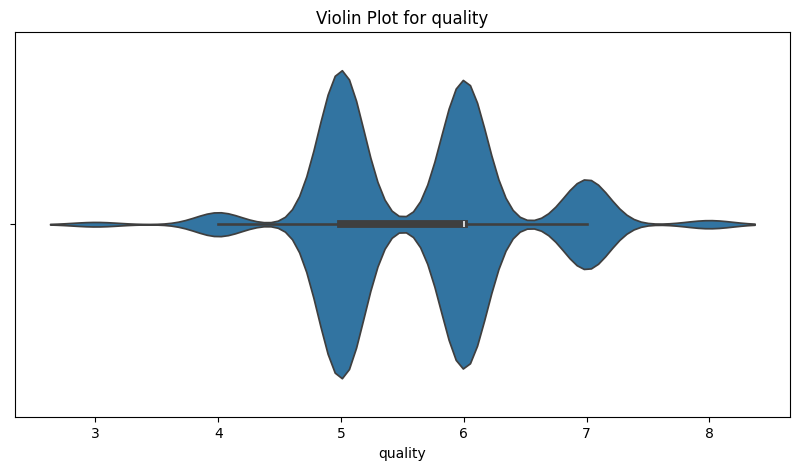

In [6]:
for i in ['fixed acidity', 'volatile acidity', 'citric acid',  'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol','quality']:
    plot(df, i)

In [7]:
out_skew_data=df.copy(True)

In [8]:
skewed_columns = ['fixed acidity', 'volatile acidity', 'citric acid',  'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol','quality']
for column in skewed_columns:
    neg = (out_skew_data[column] <= 0)
    print(f'{column} : {neg.sum()} ')
    out_skew_data.loc[neg,column] = np.nan

fixed acidity : 0 
volatile acidity : 0 
citric acid : 132 
residual sugar : 0 
chlorides : 0 
free sulfur dioxide : 0 
total sulfur dioxide : 0 
density : 0 
pH : 0 
sulphates : 0 
alcohol : 0 
quality : 0 


In [9]:
out_skew_data.isna().sum()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

In [10]:
out_skew_data['citric acid'].interpolate(method ='linear',inplace = True) 

C:\Users\Srinivasa Rao\AppData\Local\Temp\ipykernel_16464\2447146753.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  out_skew_data['citric acid'].interpolate(method ='linear',inplace = True)


In [11]:
out_skew_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             2
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
out_skew_data['citric acid'].fillna(out_skew_data['citric acid'].mean(), inplace = True)

C:\Users\Srinivasa Rao\AppData\Local\Temp\ipykernel_16464\2101868694.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  out_skew_data['citric acid'].fillna(out_skew_data['citric acid'].mean(), inplace = True)


In [13]:
out_skew_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
df_new = out_skew_data
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.290811,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.290811,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.393333,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [15]:
outlier_columns = ['residual sugar', 'sulphates', 'total sulfur dioxide', 'free sulfur dioxide','chlorides','fixed acidity','volatile acidity','density','pH','alcohol','quality','citric acid']
before_stats = df_new[outlier_columns].describe()

# Iterate over outlier columns and remove outliers
for column in outlier_columns:
    Q1 = df_new[column].quantile(0.25)
    Q3 = df_new[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_new[column] = df_new[column].clip(lower_bound, upper_bound)

# Calculate summary statistics after removing outliers
after_stats = df_new[outlier_columns].describe()

# Compare the statistics before and after outlier removal
print("Summary statistics before removing outliers:")
print(before_stats)
print("\nSummary statistics after removing outliers:")
print(after_stats)

Summary statistics before removing outliers:
       residual sugar    sulphates  total sulfur dioxide  free sulfur dioxide  \
count     1599.000000  1599.000000           1599.000000          1599.000000   
mean         2.538806     0.658149             46.467792            15.874922   
std          1.409928     0.169507             32.895324            10.460157   
min          0.900000     0.330000              6.000000             1.000000   
25%          1.900000     0.550000             22.000000             7.000000   
50%          2.200000     0.620000             38.000000            14.000000   
75%          2.600000     0.730000             62.000000            21.000000   
max         15.500000     2.000000            289.000000            72.000000   

         chlorides  fixed acidity  volatile acidity      density           pH  \
count  1599.000000    1599.000000       1599.000000  1599.000000  1599.000000   
mean      0.087467       8.319637          0.527821     0.99674

<function matplotlib.pyplot.show(close=None, block=None)>

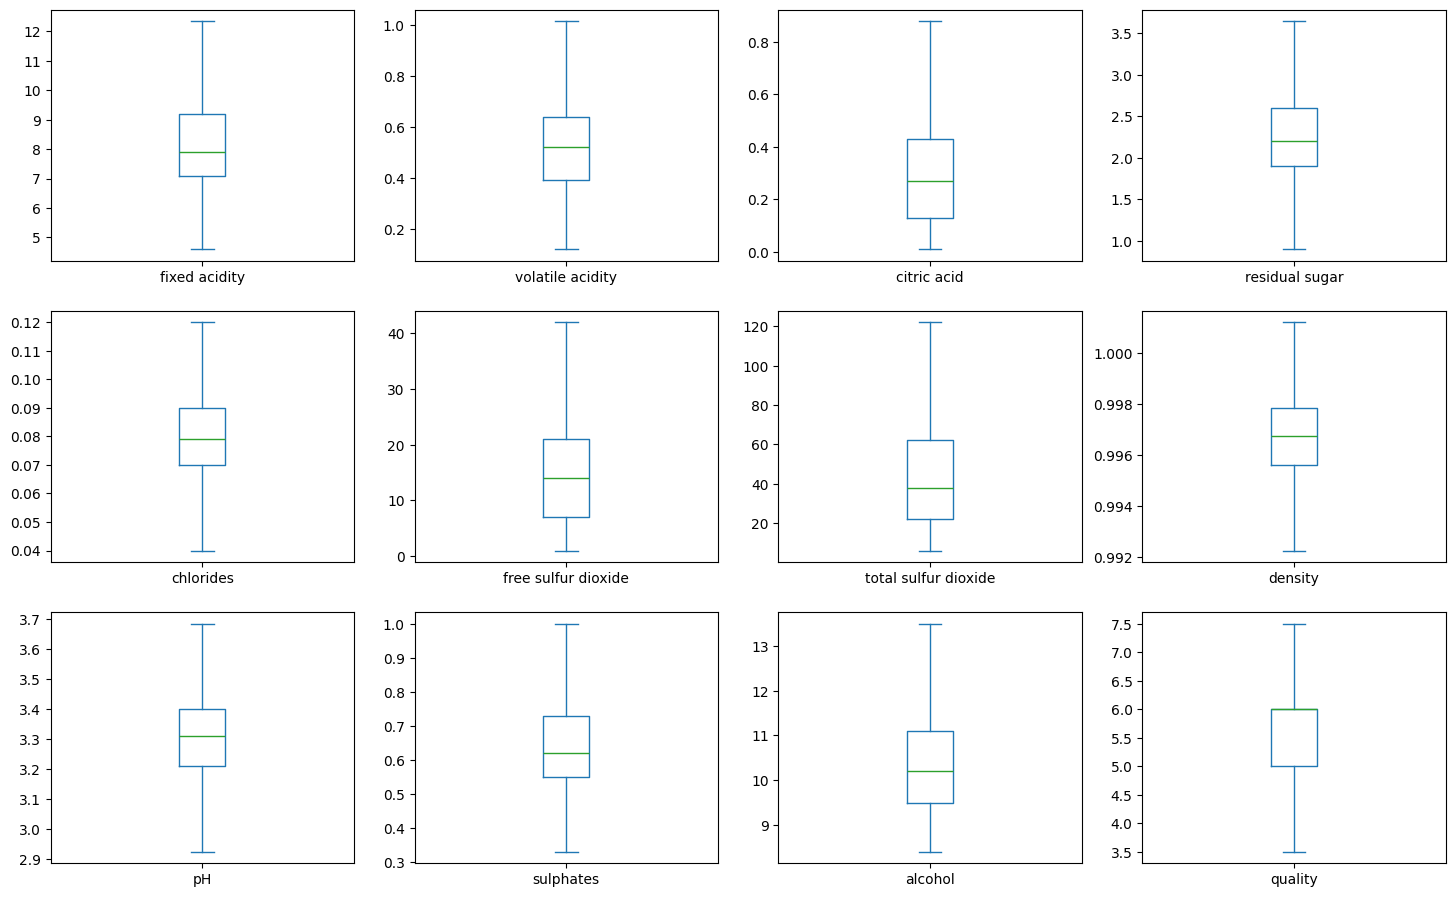

In [16]:
df_new.plot(kind='box',subplots=True,layout=(4,4),figsize=(18,15))
plt.show

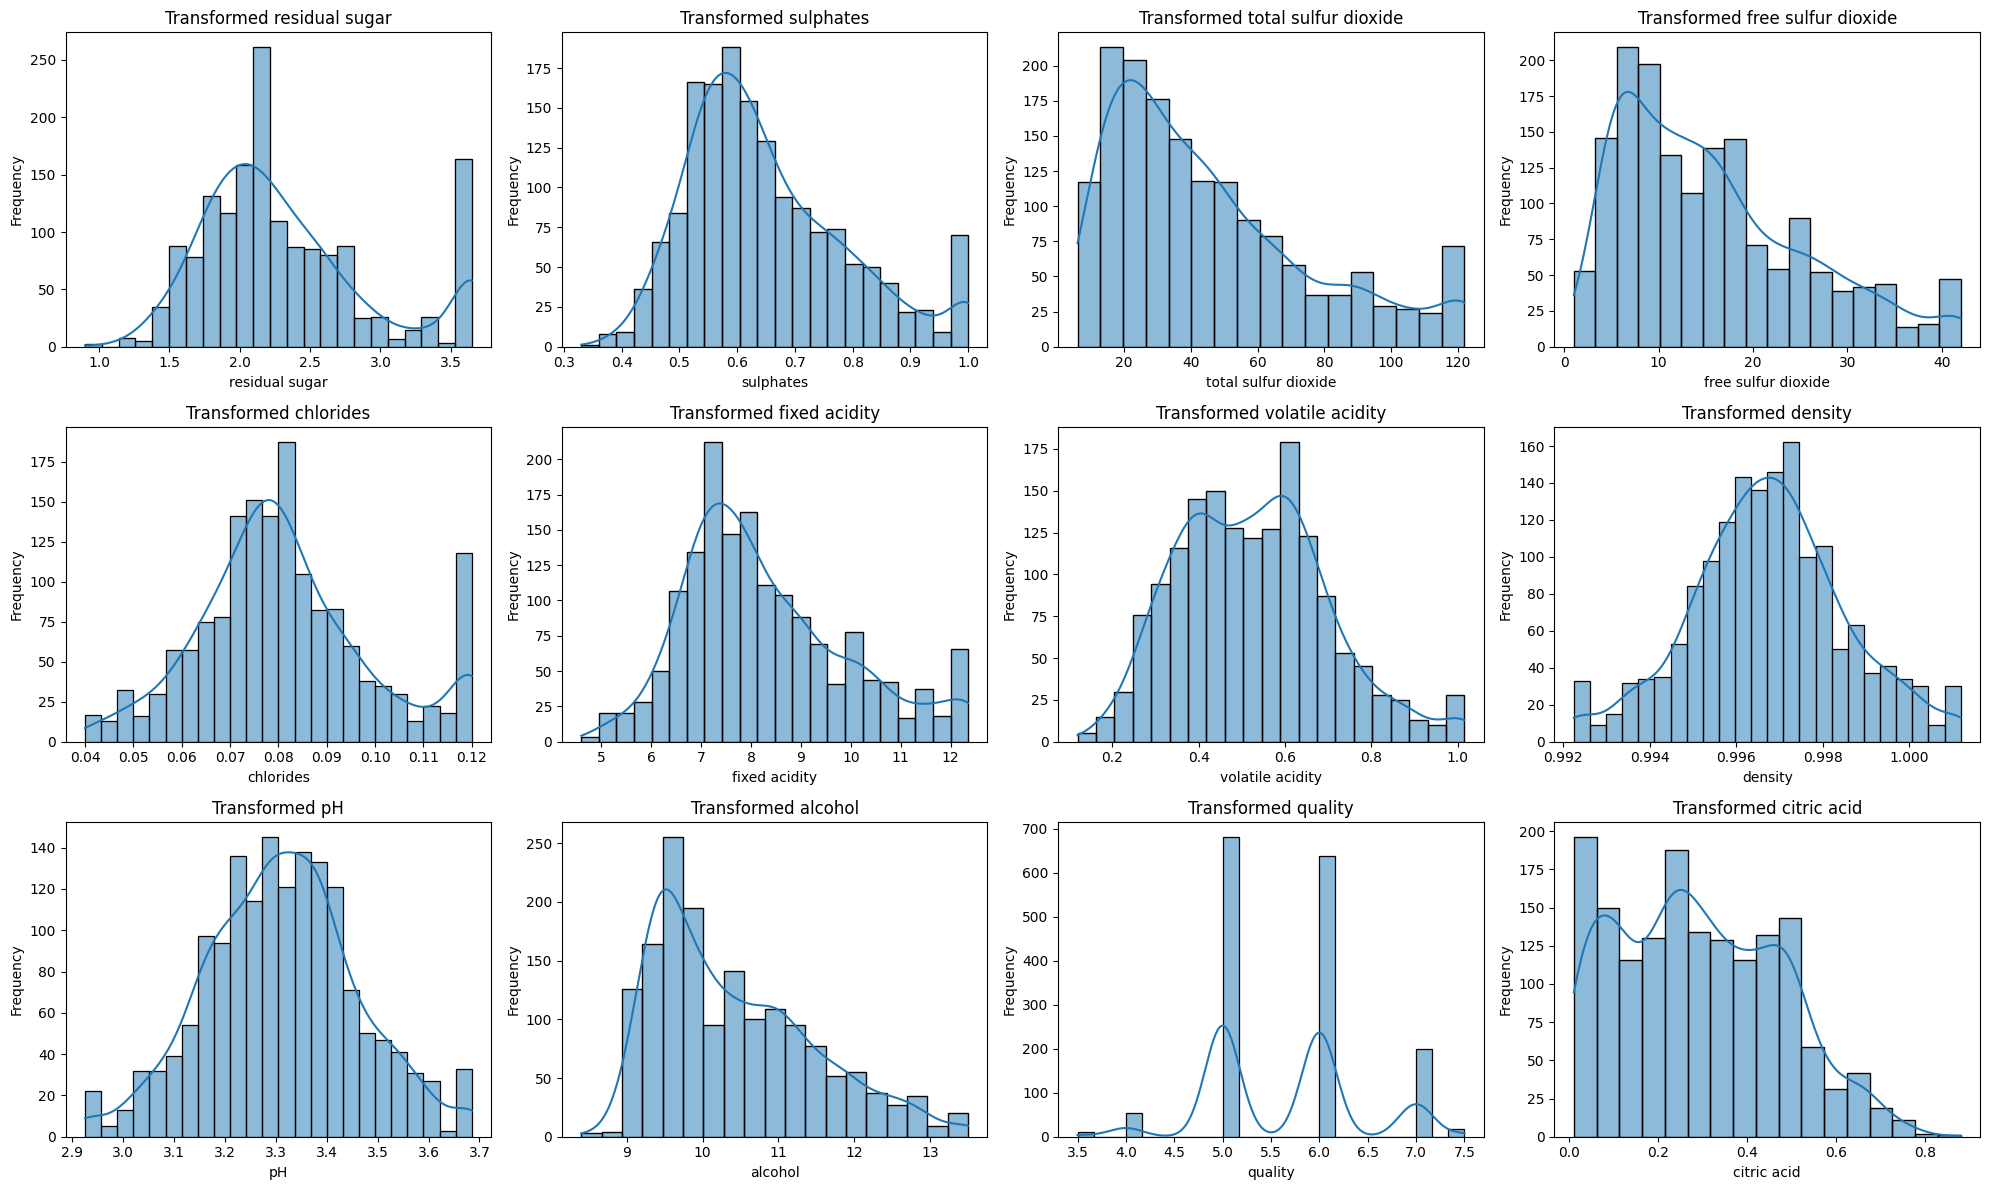

In [17]:

# Columns with potential outliers
outlier_columns = ['residual sugar', 'sulphates', 'total sulfur dioxide', 'free sulfur dioxide',
                   'chlorides', 'fixed acidity', 'volatile acidity', 'density', 'pH', 
                   'alcohol', 'quality', 'citric acid']

# Create subplots in a 3x4 grid for 12 columns
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.flatten()

# Loop through each column and create the histogram
for i, column in enumerate(outlier_columns):
    sns.histplot(df_new[column], kde=True, ax=axes[i])
    axes[i].set_title(f"Transformed {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  # Adjust the spacing between plots
plt.show()


In [31]:
def plot(df_new, column):
    plt.figure(figsize=(10,5))
    plt.subplot(1,1,1)
    sns.violinplot(data=df_new, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

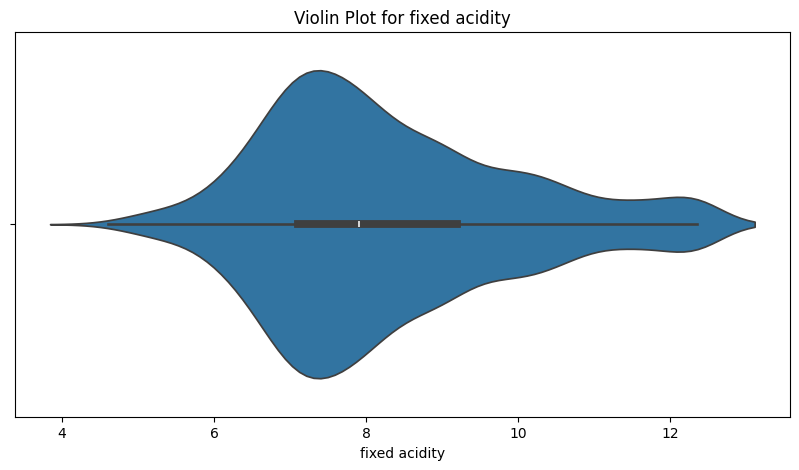

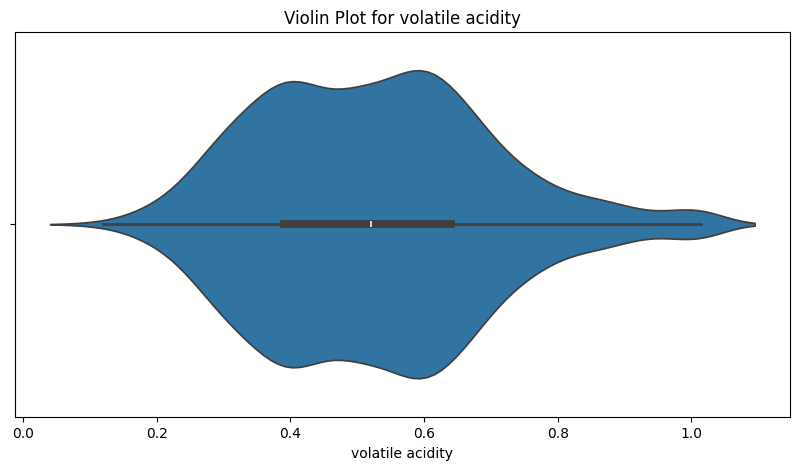

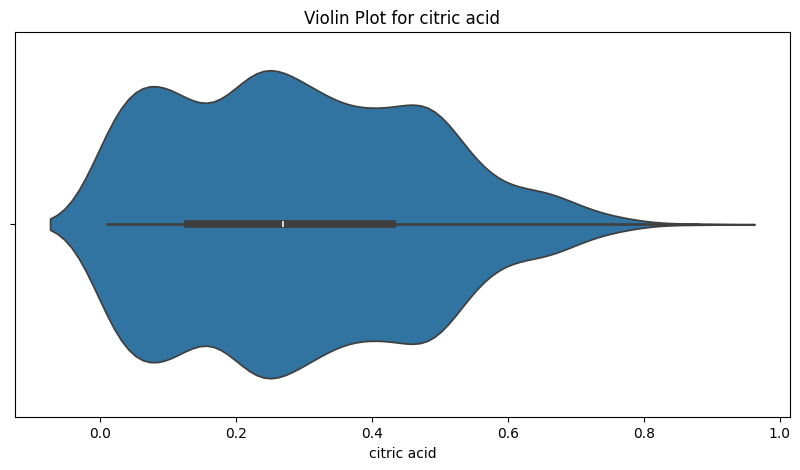

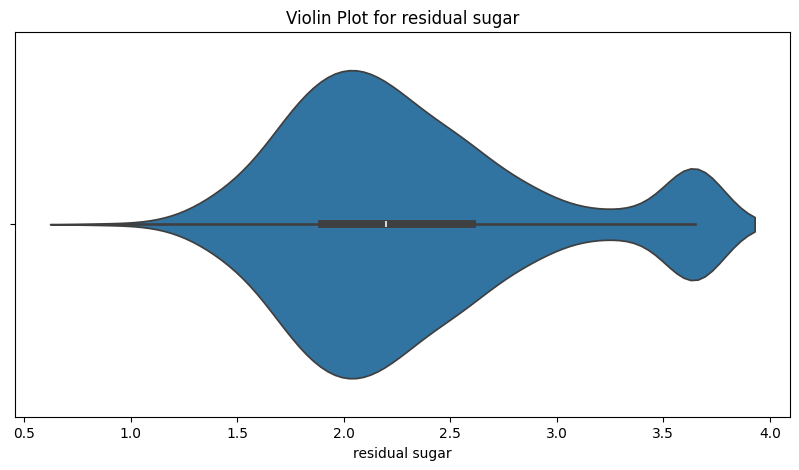

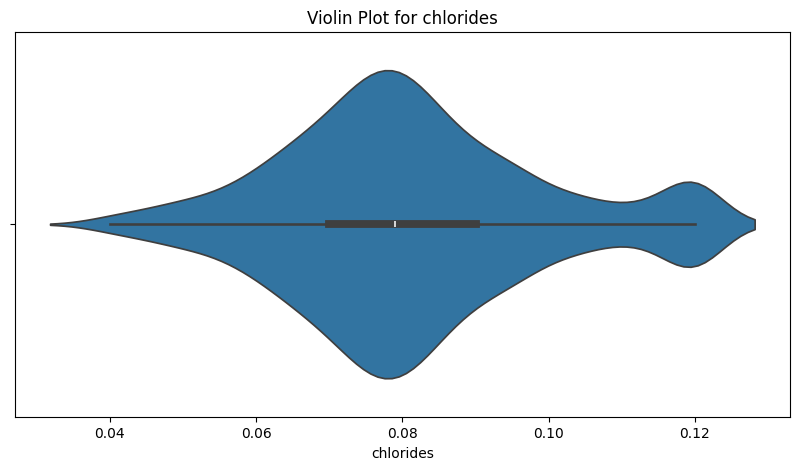

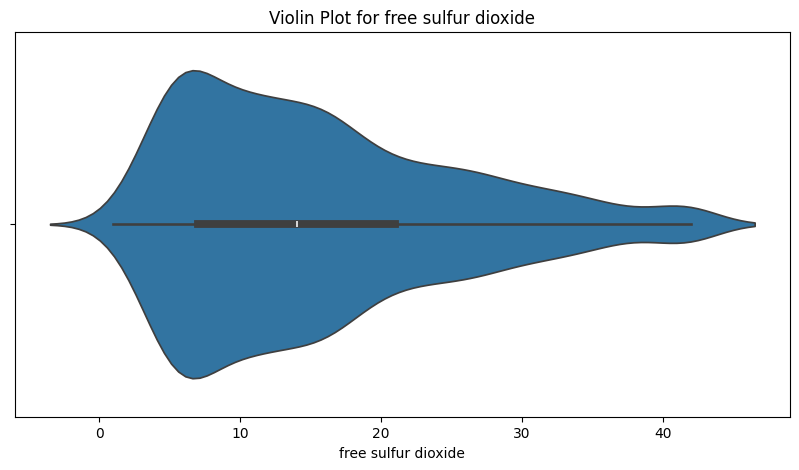

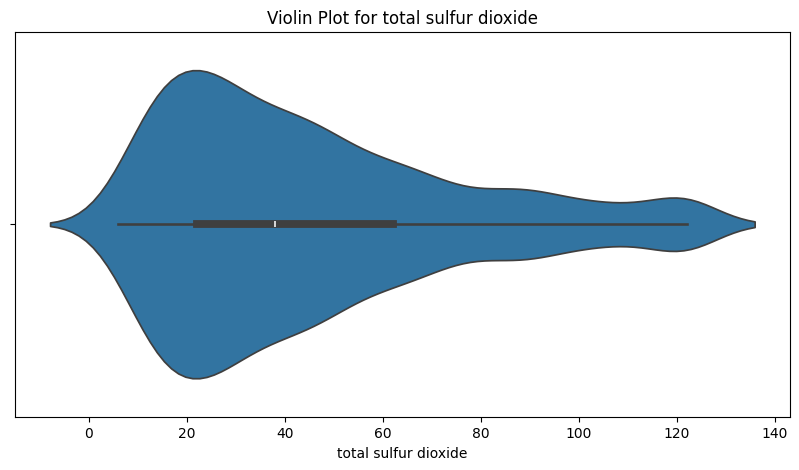

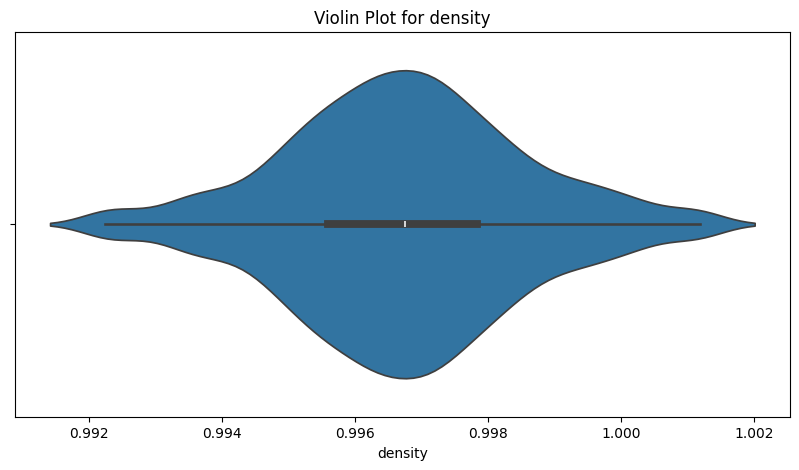

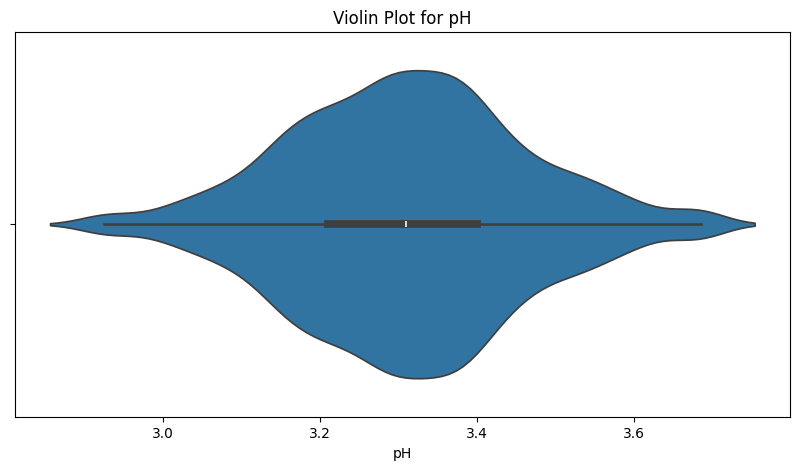

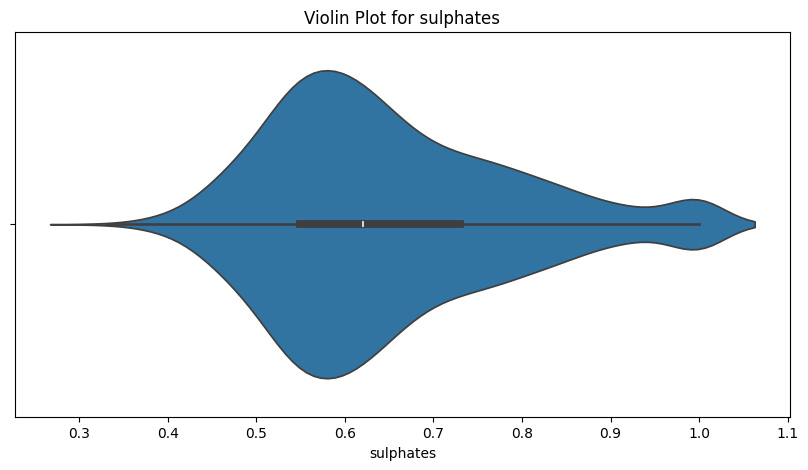

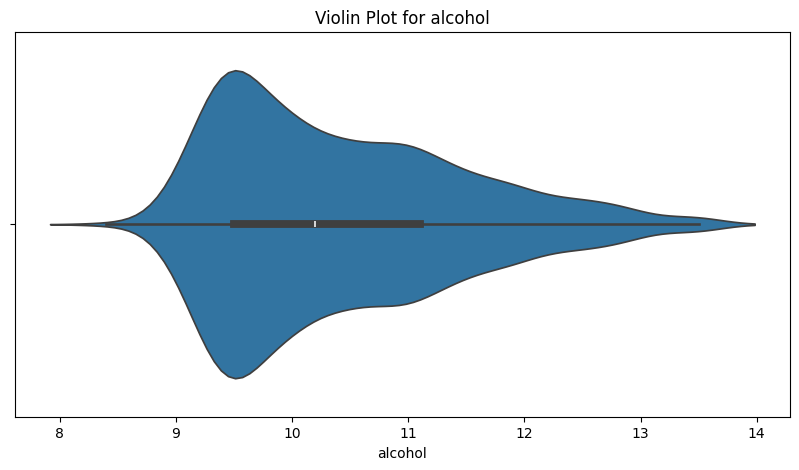

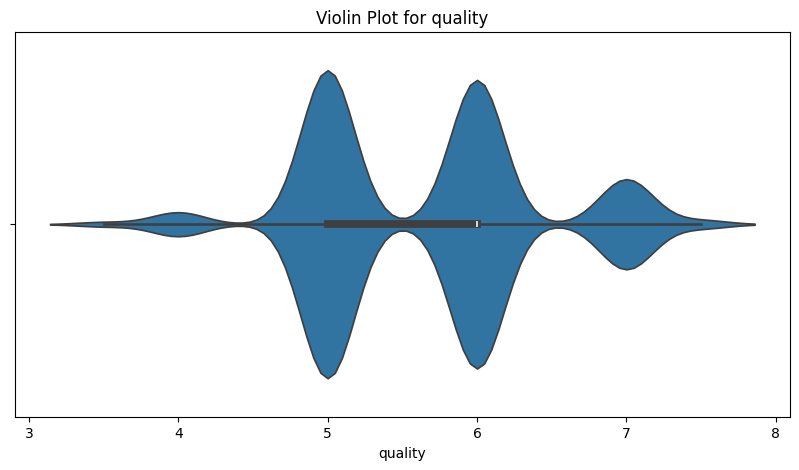

In [32]:
for i in ['fixed acidity', 'volatile acidity', 'citric acid',  'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol','quality']:
    plot(df_new, i)

In [18]:
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.290811,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.290811,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.393333,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [19]:
corrm = df_new.corr()
corrm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.268153,0.641136,0.215090,0.228484,-0.157083,-0.119486,0.668076,-0.689824,0.215195,-0.070242,0.128373
volatile acidity,-0.268153,1.000000,-0.498930,0.039427,0.133096,-0.005288,0.091583,0.017347,0.235347,-0.316181,-0.209385,-0.388883
citric acid,0.641136,-0.498930,1.000000,0.170710,0.153197,-0.067453,-0.026912,0.350432,-0.475748,0.332074,0.133888,0.210460
residual sugar,0.215090,0.039427,0.170710,1.000000,0.208471,0.082933,0.157250,0.424354,-0.094584,0.034996,0.107114,0.024647
chlorides,0.228484,0.133096,0.153197,0.208471,1.000000,-0.012169,0.098054,0.407441,-0.259512,0.107645,-0.295608,-0.180356
free sulfur dioxide,-0.157083,-0.005288,-0.067453,0.082933,-0.012169,1.000000,0.687184,-0.034012,0.075415,0.049086,-0.068099,-0.052357
total sulfur dioxide,-0.119486,0.091583,-0.026912,0.157250,0.098054,0.687184,1.000000,0.095871,-0.051863,-0.003229,-0.228860,-0.207643
density,0.668076,0.017347,0.350432,0.424354,0.407441,-0.034012,0.095871,1.000000,-0.336870,0.161310,-0.500237,-0.174567
pH,-0.689824,0.235347,-0.475748,-0.094584,-0.259512,0.075415,-0.051863,-0.336870,1.000000,-0.134702,0.195196,-0.059040
sulphates,0.215195,-0.316181,0.332074,0.034996,0.107645,0.049086,-0.003229,0.161310,-0.134702,1.000000,0.155310,0.330712


<Axes: >

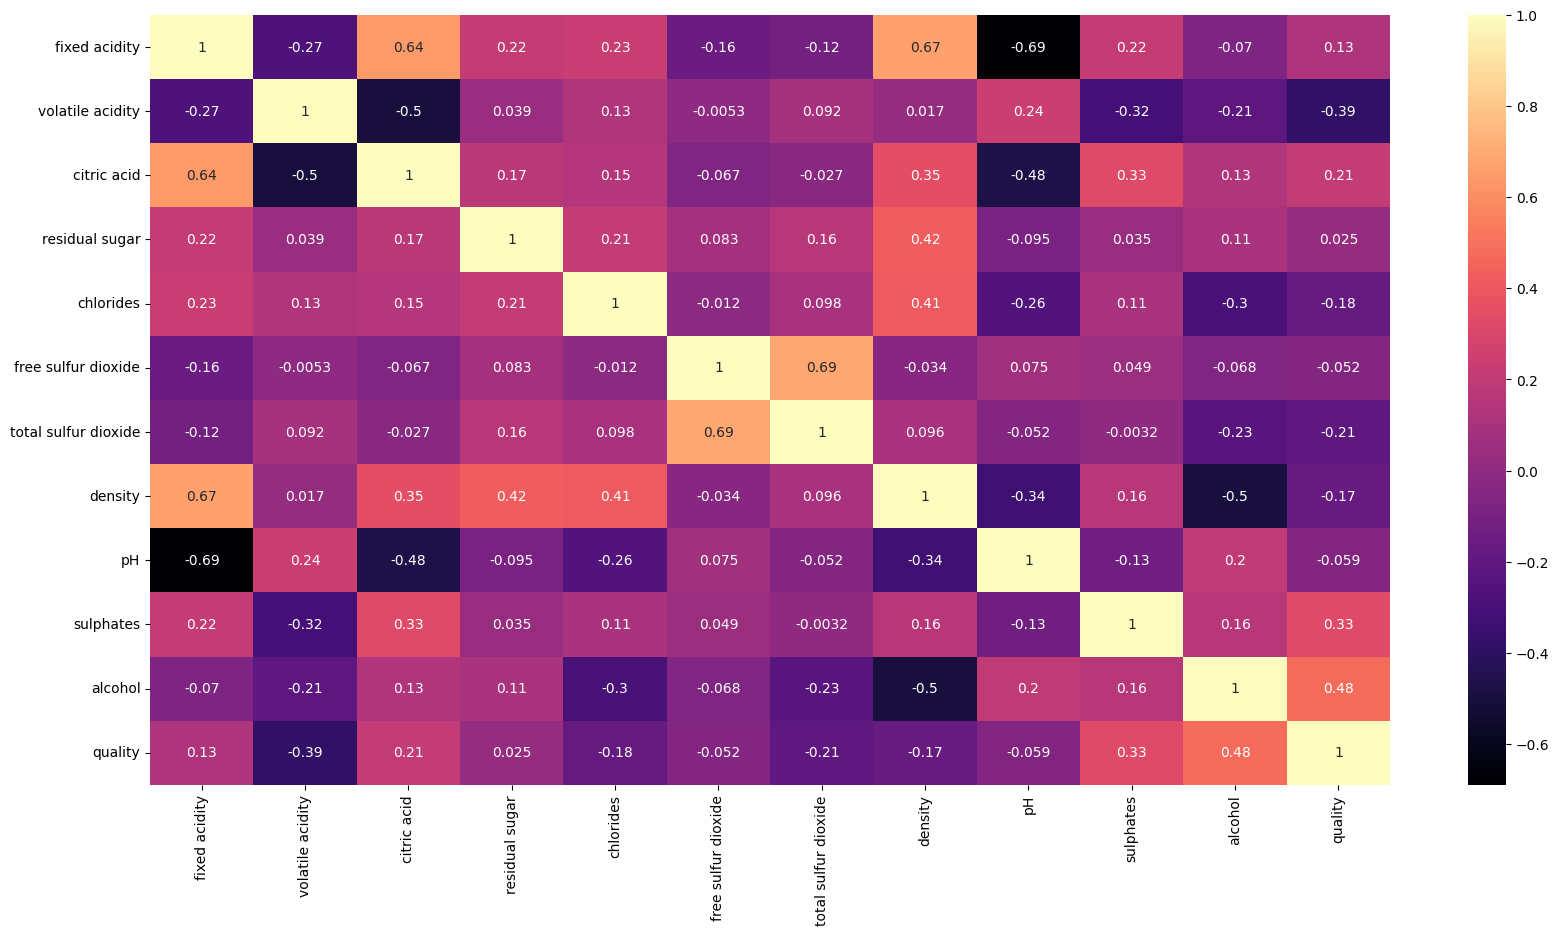

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(corrm,annot=True,cmap='magma')

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, classification_report

# Define features (X) and target (y)
X = df_new.drop('quality', axis=1)
y = df_new['quality']  # Keep y as a Series

# Encode the target variable if it's categorical
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # y_encoded will be a 1D array

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=42)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy and recall
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # Use 'macro' for multi-class
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')

# Print detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.6775
Recall: 0.3307
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        13
           2       0.75      0.76      0.76       164
           3       0.64      0.72      0.68       169
           4       0.57      0.50      0.53        48
           5       0.00      0.00      0.00         5

    accuracy                           0.68       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.65      0.68      0.66       400



c:\Users\Srinivasa Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Srinivasa Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Srinivasa Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim

# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define features (X) and target (y)
X = df_new.drop('quality', axis=1)
y = df_new['quality']  # Ensure y is a Series and will be encoded

# Encode the target variable for multi-class classification
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Convert to 1D array of class labels

# Standardize the features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=42)

# Convert the data to PyTorch tensors and move them to the GPU
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)  # Change to long for classification
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# Define the neural network model
class WineQualityNN(nn.Module):
    def __init__(self, input_size):
        super(WineQualityNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 16)
        self.outlayer = nn.Linear(16, 6)  # Output layer has 6 units for 6 classes

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.outlayer(x)
        return x

# Instantiate the model, define the loss function and optimizer
input_size = X_train.shape[1]
model = WineQualityNN(input_size).to(device)  # Move the model to GPU
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 5400
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    _, predicted_classes = torch.max(predictions, 1)  # Get the predicted class indices

# Calculate accuracy
accuracy = accuracy_score(y_test_tensor.cpu(), predicted_classes.cpu())

# Print classification report
print(classification_report(y_test_tensor.cpu(), predicted_classes.cpu()))

# Show the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')


Using device: cpu
Epoch [100/5400], Loss: 0.9674
Epoch [200/5400], Loss: 0.8583
Epoch [300/5400], Loss: 0.7162
Epoch [400/5400], Loss: 0.5086
Epoch [500/5400], Loss: 0.3208
Epoch [600/5400], Loss: 0.1965
Epoch [700/5400], Loss: 0.1192
Epoch [800/5400], Loss: 0.0678
Epoch [900/5400], Loss: 0.0379
Epoch [1000/5400], Loss: 0.0215
Epoch [1100/5400], Loss: 0.0136
Epoch [1200/5400], Loss: 0.0092
Epoch [1300/5400], Loss: 0.0066
Epoch [1400/5400], Loss: 0.0050
Epoch [1500/5400], Loss: 0.0039
Epoch [1600/5400], Loss: 0.0031
Epoch [1700/5400], Loss: 0.0025
Epoch [1800/5400], Loss: 0.0021
Epoch [1900/5400], Loss: 0.0017
Epoch [2000/5400], Loss: 0.0015
Epoch [2100/5400], Loss: 0.0013
Epoch [2200/5400], Loss: 0.0011
Epoch [2300/5400], Loss: 0.0009
Epoch [2400/5400], Loss: 0.0008
Epoch [2500/5400], Loss: 0.0007
Epoch [2600/5400], Loss: 0.0006
Epoch [2700/5400], Loss: 0.0006
Epoch [2800/5400], Loss: 0.0005
Epoch [2900/5400], Loss: 0.0005
Epoch [3000/5400], Loss: 0.0004
Epoch [3100/5400], Loss: 0.0004